In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [56]:
rng = np.random.default_rng()

In [57]:
df = pd.read_csv('standings2.csv')
df = df.set_index("Team")
df

,Balancing,Halfpipe,Funnel Endurance,Newton's Cradle,Long Jump,5 Meter Hurdles,Block Pushing,Triathlon,Sand Mogul Race,5m Sprint,Black Hole Funnel,Event 12,Event 13,Event 14,Event 15,Event 16
Team,,,,,,,,,,,,,,,,
O'rangers,6,25,20,25,4,10,15,15,4,6,10,NaN,NaN,NaN,NaN,NaN
Minty Maniacs,25,15,25,10,8,8,2,6,15,25,0,NaN,NaN,NaN,NaN,NaN
Midnight Wisps,15,12,5,11,5,20,25,10,6,5,20,NaN,NaN,NaN,NaN,NaN
Crazy Cat's Eyes,11,20,10,12,25,12,9,4,9,4,15,NaN,NaN,NaN,NaN,NaN
Savage Speeders,2,1,15,7,12,15,12,9,12,15,25,NaN,NaN,NaN,NaN,NaN
Raspberry Racers,20,7,7,15,1,25,10,5,5,12,1,NaN,NaN,NaN,NaN,NaN
Hazers,9,8,6,9,6,7,0,25,20,11,3,NaN,NaN,NaN,NaN,NaN
Team Galactic,1,11,2,20,9,11,11,11,7,9,11,NaN,NaN,NaN,NaN,NaN
Team Momo,10,10,0,5,8,4,20,20,10,2,7,NaN,NaN,NaN,NaN,NaN


In [58]:
poss_scores = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 25]

In [59]:
# ranks = pd.DataFrame(index = df.index)
# scores = pd.DataFrame(index = df.index)
# firstPlaceHistories = pd.DataFrame(index = df.index)

# ranks = pd.read_pickle("ranks.pkl")
# scores = pd.read_pickle("scores.pkl") 

In [60]:
# def fillDf(oldDf):
#     filledDf = oldDf.copy()
#     for col in oldDf.columns[oldDf.isna().any()]:
#         rng.shuffle(poss_scores)
#         filledDf[col] = poss_scores
#     filledDf["sum"] = filledDf.sum(axis=1)
#     filledDf["rank"] = filledDf["sum"].rank(ascending=False)
#     return filledDf

In [61]:
def fillDfEfficient(oldDf, iterations, scoresDf, ranksDf, firstPlaceDf):
    numColsBlank = len(oldDf.columns[oldDf.isna().any()])
    numColsFilled = 16 - numColsBlank

    for i in range(iterations):
        if i % 100 == 0:
            print("Iteration", i)

        filledDf = oldDf.copy()

        for col in oldDf.columns[numColsFilled:]:
            rng.shuffle(poss_scores)
            filledDf[col] = poss_scores
        scoresDf[i] = filledDf.sum(axis=1)
        ranksDf[i] = filledDf.sum(axis=1).rank(ascending=False)

        for colToIgnore in range(numColsFilled, -1, -1):
            rng.shuffle(poss_scores)
            filledDf.iloc[:, colToIgnore] = poss_scores
            scores = filledDf.sum(axis=1)
            bestTeam = scores.idxmax()
            firstPlaceDf.loc[bestTeam, colToIgnore] += 1
            # try:
            #     if pd.isna(firstPlaceDf.loc[bestTeam, colToIgnore]):
            #         firstPlaceDf.loc[bestTeam, colToIgnore] = 1
            #     else:
            #         firstPlaceDf.loc[bestTeam, colToIgnore] += 1
            # except KeyError:
            #     firstPlaceDf.loc[bestTeam, colToIgnore] = 1


In [62]:
ranks = pd.DataFrame(index = df.index)
scores = pd.DataFrame(index = df.index)
firstPlaceHistories = pd.DataFrame(index = df.index)

for colToIgnore in range(numColsFilled + 1):
    firstPlaceHistories.loc[df.index[0], colToIgnore] = 0

firstPlaceHistories = firstPlaceHistories.fillna(0)

iterations = 150000
fillDfEfficient(df, iterations, scores, ranks, firstPlaceHistories)

Iteration 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900


In [63]:
firstPlaceHistories = firstPlaceHistories/iterations

In [64]:
numColsBlank = len(df.columns[df.isna().any()])
numColsFilled = 16 - numColsBlank
numColsFilled

11

In [65]:
# for i in range(50000):
#     if i % 500 == 0:
#         print(i)

#     scenario = fillDf(df)

#     scores[i] = scenario["sum"]
#     ranks[i] = scenario["rank"]

In [66]:
ranks.to_pickle("ranks.pkl")
scores.to_pickle("scores.pkl")

In [67]:
ranks

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Team,,,,,,,,,,,,,,,,,,,,,
O'rangers,2.0,1.0,1.0,4.0,3.0,2.0,4.0,1.0,1.0,4.0,...,4.0,1.0,1.0,2.0,2.5,1.0,2.0,2.0,3.0,1.0
Minty Maniacs,1.0,6.0,3.5,2.0,1.0,3.5,2.0,3.0,2.0,1.0,...,3.0,3.0,2.0,1.0,4.0,4.0,5.0,1.0,1.0,6.0
Midnight Wisps,5.0,3.5,2.0,3.0,2.0,6.0,1.0,2.0,4.0,3.0,...,2.0,2.0,4.0,5.0,5.0,3.0,6.5,4.0,4.0,2.0
Crazy Cat's Eyes,3.0,2.0,3.5,5.0,7.0,1.0,7.0,5.0,5.0,2.0,...,1.0,4.0,3.0,3.0,1.0,2.0,1.0,5.0,2.0,4.0
Savage Speeders,4.0,3.5,5.0,1.0,4.0,3.5,5.0,4.0,3.0,8.0,...,5.0,5.0,7.0,4.0,7.0,6.5,3.0,3.0,5.5,3.0
Raspberry Racers,8.0,5.0,9.0,6.0,6.0,5.0,8.0,6.0,8.5,6.0,...,7.5,9.0,6.0,10.0,6.0,10.0,8.0,9.0,7.5,5.0
Hazers,11.0,10.5,6.0,10.0,5.0,7.0,6.0,7.5,10.0,9.0,...,7.5,8.0,8.5,9.0,8.0,8.0,6.5,7.0,9.0,7.0
Team Galactic,6.0,7.0,7.0,8.5,8.5,9.0,9.0,9.0,7.0,7.0,...,10.0,6.5,8.5,6.0,11.0,9.0,9.0,6.0,5.5,10.0
Team Momo,7.0,9.0,11.0,7.0,8.5,10.0,10.0,10.0,6.0,10.0,...,6.0,6.5,5.0,8.0,2.5,5.0,4.0,8.0,7.5,8.0


O'rangers
Minty Maniacs
Midnight Wisps
Crazy Cat's Eyes
Savage Speeders
Raspberry Racers
Hazers
Team Galactic
Team Momo
Oceanics
Thunderbolts
Balls of Chaos
Green Ducks
Bumblebees
Hornets
Mellow Yellow


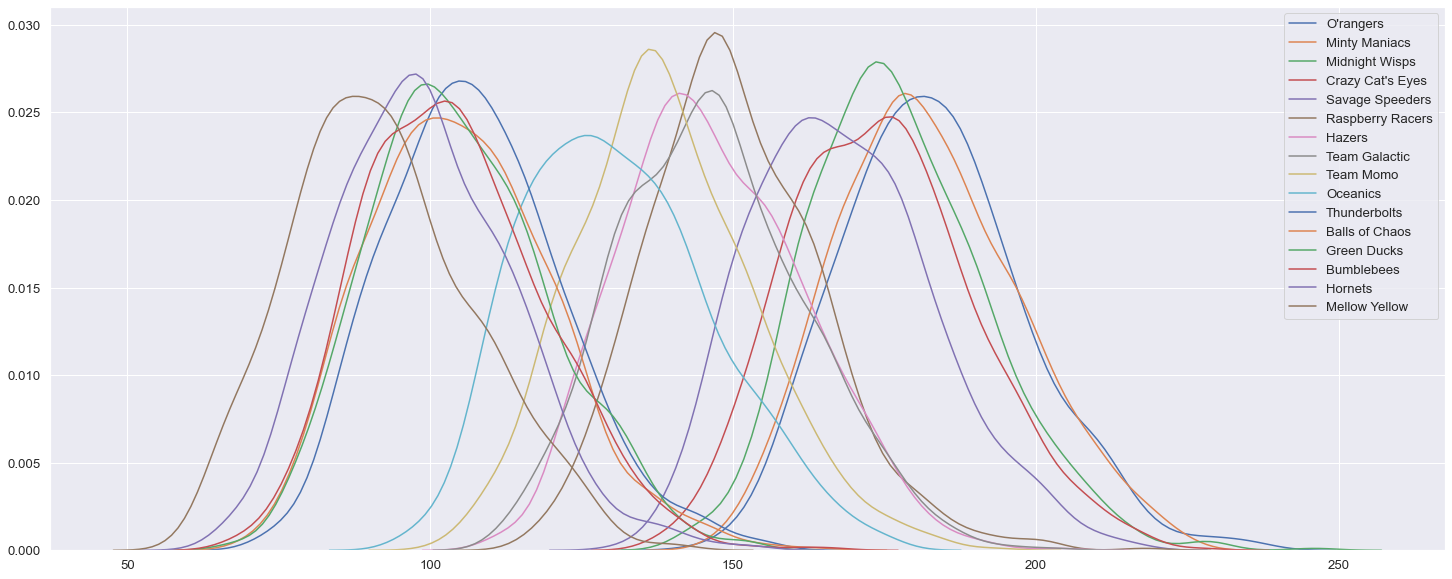

In [68]:
plt.figure(figsize=(25,10))
for idx, row in scores.iterrows():
    print(idx)
    sns.kdeplot(row, label = idx)
plt.legend()
plt.savefig("scores_hist.png")
plt.show()

In [69]:
# plt.figure(figsize=(25,10))
# for idx, row in ranks.iterrows():
#     print(idx)
#     sns.distplot(row, label = idx, kde = False, bins = range(1,18))
# plt.legend()
# plt.savefig("ranks_hist.png")
# plt.show()

In [70]:

# rankCounts = pd.DataFrame(df["Team"])
# rankCounts = rankCounts.set_index("Team")
# for i in range(1, 17):
#     print(i)
#     rankCounts[str(i)] = ranks[(i <= ranks) & (ranks < i+1)].count(axis = 1)
# rankCounts


In [71]:
# sns.set()
# plt.figure(figsize=(25,15))
# rankCounts2 = rankCounts2/500
# sns.heatmap(rankCounts2, annot = True)
# plt.show()

In [72]:
rankHeatmap = pd.DataFrame(index = df.index)
for idx, row in ranks.iterrows():
    counts = row.value_counts(normalize = True)
    for i in range(1, 17):
        rankHeatmap.loc[idx, i] = counts[(counts.index >= i) & (counts.index < i+1)].sum()
rankHeatmap

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Team,,,,,,,,,,,,,,,,
O'rangers,0.308,0.241,0.184,0.137,0.075,0.036,0.014,0.004,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Minty Maniacs,0.294,0.233,0.185,0.142,0.085,0.045,0.013,0.002,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Midnight Wisps,0.170,0.202,0.211,0.181,0.127,0.080,0.021,0.007,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Crazy Cat's Eyes,0.144,0.183,0.186,0.172,0.149,0.098,0.039,0.025,0.004,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Savage Speeders,0.091,0.109,0.127,0.173,0.203,0.150,0.088,0.039,0.016,0.004,0.000,0.000,0.000,0.000,0.000,0.000
Raspberry Racers,0.014,0.015,0.029,0.063,0.103,0.173,0.222,0.183,0.121,0.064,0.010,0.003,0.000,0.000,0.000,0.000
Hazers,0.005,0.015,0.036,0.043,0.091,0.135,0.182,0.211,0.156,0.090,0.029,0.007,0.000,0.000,0.000,0.000
Team Galactic,0.006,0.014,0.027,0.056,0.082,0.158,0.166,0.178,0.165,0.088,0.045,0.014,0.001,0.000,0.000,0.000
Team Momo,0.002,0.005,0.010,0.029,0.038,0.075,0.140,0.188,0.223,0.182,0.064,0.033,0.006,0.004,0.001,0.000


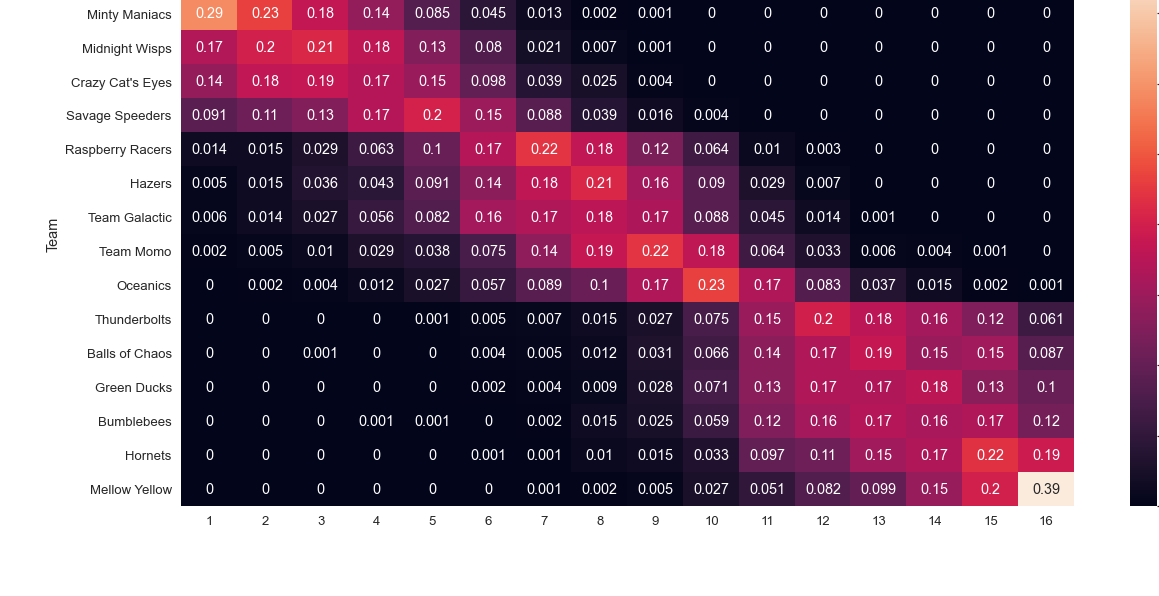

In [73]:
plt.figure(figsize = (20, 10))
sns.set(font_scale = 1.2)
plt.title("Heatmap of Placement Probabilities")
plt.xlabel("Rank")
sns.heatmap(rankHeatmap, annot = True)
plt.savefig("rankHeatmap.png", dpi = 200, facecolor = 'white', transparent = False)
plt.show()

In [74]:
# def fillDfFixed(oldDf, colsToLeave):
#     filledDf = oldDf.copy()
#     for col in oldDf.columns[colsToLeave:]:
#         rng.shuffle(poss_scores)
#         filledDf[col] = poss_scores
#     filledDf["sum"] = filledDf.sum(axis=1)
#     filledDf["rank"] = filledDf["sum"].rank(ascending=False)
#     return filledDf

In [75]:
# firstPlaceHistories = pd.DataFrame(index = df.index)
# for eventsToIgnore in range(0, numColsFilled + 1):
#     ranks = pd.DataFrame(index = df.index)
#     print(f"Keeping {eventsToIgnore} event(s)")

#     for i in range(25000):
#         if i % 500 == 0:
#             print(i)
#         scenario = fillDfFixed(df, eventsToIgnore)
#         ranks[i] = scenario["rank"]
    
#     for idx, row in ranks.iterrows():
#         counts = row.value_counts(normalize = True)
#         firstPlaceHistories.loc[idx, eventsToIgnore] = counts[counts.index < 2].sum()




In [76]:
# print(colorDict)
colorDict = {
    'Minty Maniacs': "#429e9d",
    "O'rangers": "#fd6a02",
    "Crazy Cat's Eyes": "green",
    'Raspberry Racers': "#e30b5d",
    'Midnight Wisps': "#02075d",
    'Team Galactic': "#7F00FF",
    'Savage Speeders': "#800000",
    'Balls of Chaos': "#cc7722",
    'Hazers': "grey",
    'Bumblebees': "#f1b82d",
    'Team Momo': "#1C004D",
    'Green Ducks': "#228c22",
    'Thunderbolts': "blue",
    'Hornets': "#9acd32",
    'Oceanics': "#265b5f",
    'Mellow Yellow': "#ffd300"
}

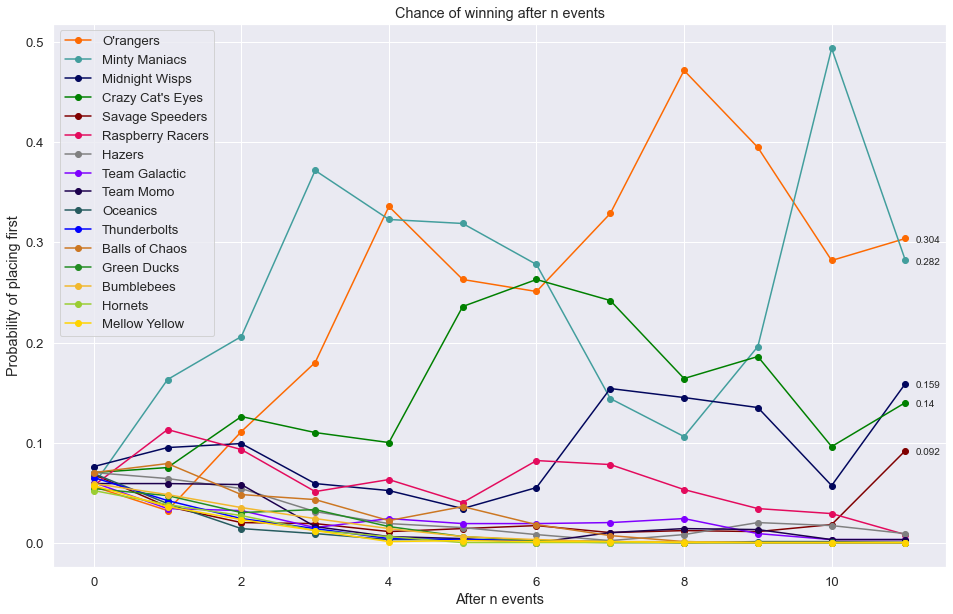

In [77]:
plt.figure(figsize = (16, 10))
sns.set(font_scale=1.2)
# colorDict = {}
for idx, row in firstPlaceHistories.iterrows():
    # colorDict[idx] = "#000000"
    plt.plot(range(numColsFilled + 1), row, label = idx, marker = 'o', color = colorDict[idx])
for idx, row in list(firstPlaceHistories.iterrows())[:5]:
    plt.annotate(round(row[numColsFilled], 3), (numColsFilled, row[numColsFilled]), ha="left", textcoords="offset points", xytext=(10,-4), fontsize = 'x-small')
plt.title("Chance of winning after n events")
plt.ylabel("Probability of placing first")
plt.xlabel("After n events")
plt.legend()
plt.savefig("rankHistory.png", dpi = 200)
plt.show()

In [78]:
# g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5)

# # Draw the densities in a few steps
# g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
# g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
# g.map(plt.axhline, y=0, lw=2, clip_on=False)


# # Define and use a simple function to label the plot in axes coordinates
# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(0, .2, label, fontweight="bold", color=color,
#             ha="left", va="center", transform=ax.transAxes)


# g.map(label, "x")

# # Set the subplots to overlap
# g.fig.subplots_adjust(hspace=-.25)

# # Remove axes details that don't play well with overlap
# g.set_titles("")
# g.set(yticks=[])
# g.despine(bottom=True, left=True)